In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, balanced_accuracy_score, precision_score, recall_score
from tqdm.notebook import tqdm

from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression

%load_ext autoreload
%autoreload 2

from features_chugun import process_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
train = pd.read_csv('../data/chugun_train.csv').drop([1024, 2041])
test = pd.read_csv('../data/chugun_test.csv')
target = pd.read_csv('../data/target_train.csv').drop([1024, 2041])

In [5]:
def metric(answers, user_csv):

    delta_c = np.abs(np.array(answers['C']) - np.array(user_csv['C']))
    hit_rate_c = np.int64(delta_c < 0.02)

    delta_t = np.abs(np.array(answers['TST']) - np.array(user_csv['TST']))
    hit_rate_t = np.int64(delta_t < 20)

    N = np.size(answers['C'])
    
    return np.sum(hit_rate_c) / N, np.sum(hit_rate_t) / N, np.sum(hit_rate_c + hit_rate_t) / 2 / N

In [6]:
data = process_data(train, test)[0]
data = data.drop(['total_seconds', 'NPLV'], axis=1)

In [7]:
is_train = data.index.isin(train.index).astype(int)

$\pm$

In [76]:
is_train.sum()

2061

In [133]:
scores = []
predictions = []

for test_index in tqdm(data[is_train==1].index):
    train_idx = data.index.difference([test_index])
    
    X_train, y_train = data.loc[train_idx].values, is_train[train_idx]
    X_test, y_test = data.loc[test_index].values.reshape(1, -1), is_train[test_index]
    
    log = LogisticRegression()
    ridge = RidgeClassifier()

    log.fit(X_train, y_train)
    ridge.fit(X_train, y_train)

    predictions.append(
        dict(index=test_index,
             logistic=log.predict_proba(X_test)[0][1],
             ridge=ridge.decision_function(X_test)[0]
            )
    )
# print('Mean ROC-AUC: {} ± {}'.format(np.mean(scores), np.std(scores)))

In [137]:
pd.DataFrame(predictions).to_csv('../is_train.csv', index=False)

<AxesSubplot:xlabel='prediction', ylabel='Count'>

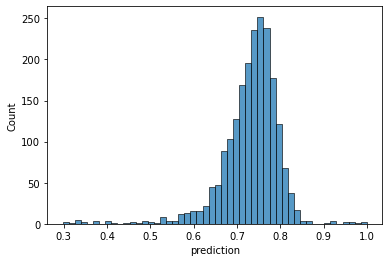

In [127]:
sns.histplot(pd.DataFrame(predictions).prediction, bins=50)

<AxesSubplot:xlabel='prediction', ylabel='Count'>

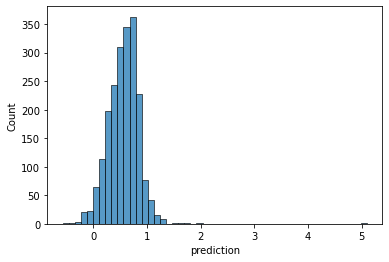

In [119]:
sns.histplot(pd.DataFrame(predictions).prediction, bins=50)

In [59]:
data.columns[model.decision_function(X_test).argsort()[::-1]]

IndexError: index 278 is out of bounds for axis 0 with size 20

<AxesSubplot:xlabel='VES', ylabel='Count'>

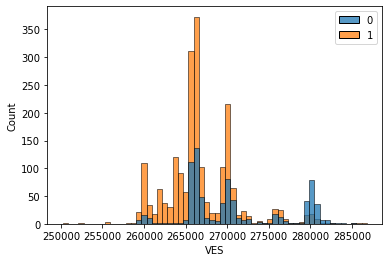

In [47]:
mask = (data.VES > 250000)&(data.VES < 288000)

sns.histplot(data=data[mask], x='VES', hue=is_train[mask])

<AxesSubplot:xlabel='T', ylabel='Count'>

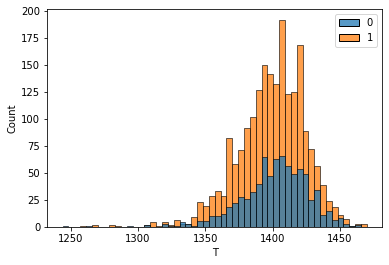

In [50]:
mask = (data.VES > 0)

sns.histplot(data=data[mask], x='T', hue=is_train[mask])